<a href="https://colab.research.google.com/github/khushbooekhande/DrugRecommendationSystem/blob/master/Implementation/Drug_Recommendation_WeightedAvg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [153]:
pip install vaderSentiment

In [0]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [155]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
merged_data = pd.read_csv('/content/drive/My Drive/gtdt/Merged_Dataset.csv')

In [157]:
merged_data.head()

,Drug,Disease,Review,Rating,UsefulCount,Symptoms
0,Aspirin,transient ischemic attack,"""No side effects, easy to take, no more sympt...",10,10,"['speech slurred', 'dysarthria', 'facial pares..."
1,Clopidogrel,transient ischemic attack,"""I&#039;ve been taking this medicine for a lit...",10,8,"['speech slurred', 'dysarthria', 'facial pares..."
2,Clopidogrel,transient ischemic attack,"""I took ibuprofen (2 caps at night for severe ...",6,13,"['speech slurred', 'dysarthria', 'facial pares..."
3,Clopidogrel,transient ischemic attack,"""After my VAD Stroke I am on plavix. I have a...",5,9,"['speech slurred', 'dysarthria', 'facial pares..."
4,Bayer Children's Aspirin,transient ischemic attack,"""No side effects, easy to take, no more sympt...",10,10,"['speech slurred', 'dysarthria', 'facial pares..."


In [158]:
merged_data.shape

(10060, 6)

In [0]:
review_list = list(merged_data.Review)

**Sentiment analysis of drug reviews using the VADER tool.**

In [0]:
sentiments = []
positive = []
negative = []
neutral = []
compound = []


for text in review_list:

  # Running Vader Analysis on each review
  com = analyser.polarity_scores(text)["compound"]
  pos = analyser.polarity_scores(text)["pos"]
  neu = analyser.polarity_scores(text)["neu"]
  neg = analyser.polarity_scores(text)["neg"]

  # Adding each value to the corresponding array
  positive.append(pos)
  negative.append(neg)
  neutral.append(neu)
  compound.append(com)
  sentiments.append({"Review":text,
                     "Positive": pos,
                     "Negative": neu,
                     "Neutral": neg,
                     "Compound": com})

sentiments_pd = pd.DataFrame.from_dict(sentiments)

In [161]:
sentiments_pd

,Review,Positive,Negative,Neutral,Compound
0,"""No side effects, easy to take, no more sympt...",0.206,0.638,0.156,0.1779
1,"""I&#039;ve been taking this medicine for a lit...",0.098,0.762,0.140,-0.4092
2,"""I took ibuprofen (2 caps at night for severe ...",0.000,0.721,0.279,-0.8176
3,"""After my VAD Stroke I am on plavix. I have a...",0.055,0.945,0.000,0.6757
4,"""No side effects, easy to take, no more sympt...",0.206,0.638,0.156,0.1779
...,...,...,...,...,...
10055,"""Reminds me of Adderall but only a natural way...",0.081,0.919,0.000,0.5023
10056,"""My husband has Vascular Dementia for appox. 4...",0.177,0.674,0.149,0.3272
10057,"""I&#039;ve only been using this medication (pa...",0.164,0.638,0.198,-0.1531
10058,"""Makes me feel ill.""",0.000,0.517,0.483,-0.4215


In [162]:
merged_data

,Drug,Disease,Review,Rating,UsefulCount,Symptoms
0,Aspirin,transient ischemic attack,"""No side effects, easy to take, no more sympt...",10,10,"['speech slurred', 'dysarthria', 'facial pares..."
1,Clopidogrel,transient ischemic attack,"""I&#039;ve been taking this medicine for a lit...",10,8,"['speech slurred', 'dysarthria', 'facial pares..."
2,Clopidogrel,transient ischemic attack,"""I took ibuprofen (2 caps at night for severe ...",6,13,"['speech slurred', 'dysarthria', 'facial pares..."
3,Clopidogrel,transient ischemic attack,"""After my VAD Stroke I am on plavix. I have a...",5,9,"['speech slurred', 'dysarthria', 'facial pares..."
4,Bayer Children's Aspirin,transient ischemic attack,"""No side effects, easy to take, no more sympt...",10,10,"['speech slurred', 'dysarthria', 'facial pares..."
...,...,...,...,...,...,...
10055,Galantamine,alzheimer's disease,"""Reminds me of Adderall but only a natural way...",10,7,"['drool', 'agitation', 'nightmare', 'rhonchus'..."
10056,Memantine,alzheimer's disease,"""My husband has Vascular Dementia for appox. 4...",1,11,"['drool', 'agitation', 'nightmare', 'rhonchus'..."
10057,Exelon,alzheimer's disease,"""I&#039;ve only been using this medication (pa...",9,100,"['drool', 'agitation', 'nightmare', 'rhonchus'..."
10058,Donepezil,alzheimer's disease,"""Makes me feel ill.""",3,2,"['drool', 'agitation', 'nightmare', 'rhonchus'..."


In [0]:
#Adding the sentiment analysis columns to the merged dataset.
merged_data["Positive"] = positive
merged_data["Negative"] = negative
merged_data["Neutral"] = neutral
merged_data["Compound"] = compound
merged_data["Review_Sentiment"] = ''

In [164]:
merged_data.head()

,Drug,Disease,Review,Rating,UsefulCount,Symptoms,Positive,Negative,Neutral,Compound,Review_Sentiment
0,Aspirin,transient ischemic attack,"""No side effects, easy to take, no more sympt...",10,10,"['speech slurred', 'dysarthria', 'facial pares...",0.206,0.156,0.638,0.1779,
1,Clopidogrel,transient ischemic attack,"""I&#039;ve been taking this medicine for a lit...",10,8,"['speech slurred', 'dysarthria', 'facial pares...",0.098,0.140,0.762,-0.4092,
2,Clopidogrel,transient ischemic attack,"""I took ibuprofen (2 caps at night for severe ...",6,13,"['speech slurred', 'dysarthria', 'facial pares...",0.000,0.279,0.721,-0.8176,
3,Clopidogrel,transient ischemic attack,"""After my VAD Stroke I am on plavix. I have a...",5,9,"['speech slurred', 'dysarthria', 'facial pares...",0.055,0.000,0.945,0.6757,
4,Bayer Children's Aspirin,transient ischemic attack,"""No side effects, easy to take, no more sympt...",10,10,"['speech slurred', 'dysarthria', 'facial pares...",0.206,0.156,0.638,0.1779,


Based on the compound value we can determine whether the overall sentiment of the review is postive, negative or neutral.
Below will be the threshold we shall be using for classifying the review sentiment class:
1. Positive: compound score >= 0.05
2. Neutral : -0.05 < compound score < 0.05
3. Negative: compound score <= -0.05

In [0]:
merged_data.loc[merged_data['Compound'] >= 0.05, 'Review_Sentiment'] = 'Positive'
merged_data.loc[merged_data['Compound'] <= -0.05, 'Review_Sentiment'] = 'Negative'

In [166]:
merged_data

,Drug,Disease,Review,Rating,UsefulCount,Symptoms,Positive,Negative,Neutral,Compound,Review_Sentiment
0,Aspirin,transient ischemic attack,"""No side effects, easy to take, no more sympt...",10,10,"['speech slurred', 'dysarthria', 'facial pares...",0.206,0.156,0.638,0.1779,Positive
1,Clopidogrel,transient ischemic attack,"""I&#039;ve been taking this medicine for a lit...",10,8,"['speech slurred', 'dysarthria', 'facial pares...",0.098,0.140,0.762,-0.4092,Negative
2,Clopidogrel,transient ischemic attack,"""I took ibuprofen (2 caps at night for severe ...",6,13,"['speech slurred', 'dysarthria', 'facial pares...",0.000,0.279,0.721,-0.8176,Negative
3,Clopidogrel,transient ischemic attack,"""After my VAD Stroke I am on plavix. I have a...",5,9,"['speech slurred', 'dysarthria', 'facial pares...",0.055,0.000,0.945,0.6757,Positive
4,Bayer Children's Aspirin,transient ischemic attack,"""No side effects, easy to take, no more sympt...",10,10,"['speech slurred', 'dysarthria', 'facial pares...",0.206,0.156,0.638,0.1779,Positive
...,...,...,...,...,...,...,...,...,...,...,...
10055,Galantamine,alzheimer's disease,"""Reminds me of Adderall but only a natural way...",10,7,"['drool', 'agitation', 'nightmare', 'rhonchus'...",0.081,0.000,0.919,0.5023,Positive
10056,Memantine,alzheimer's disease,"""My husband has Vascular Dementia for appox. 4...",1,11,"['drool', 'agitation', 'nightmare', 'rhonchus'...",0.177,0.149,0.674,0.3272,Positive
10057,Exelon,alzheimer's disease,"""I&#039;ve only been using this medication (pa...",9,100,"['drool', 'agitation', 'nightmare', 'rhonchus'...",0.164,0.198,0.638,-0.1531,Negative
10058,Donepezil,alzheimer's disease,"""Makes me feel ill.""",3,2,"['drool', 'agitation', 'nightmare', 'rhonchus'...",0.000,0.483,0.517,-0.4215,Negative


In [0]:
merged_data["Review_Sentiment"].replace('', 'Neutral', inplace = True)

In [0]:
#Dropping positive, negative, neutral and compound columns.
merged_data = merged_data.drop(columns = ["Positive", "Negative", "Neutral", "Compound"])

In [169]:
merged_data.shape

(10060, 7)

In [170]:
merged_data.head()

,Drug,Disease,Review,Rating,UsefulCount,Symptoms,Review_Sentiment
0,Aspirin,transient ischemic attack,"""No side effects, easy to take, no more sympt...",10,10,"['speech slurred', 'dysarthria', 'facial pares...",Positive
1,Clopidogrel,transient ischemic attack,"""I&#039;ve been taking this medicine for a lit...",10,8,"['speech slurred', 'dysarthria', 'facial pares...",Negative
2,Clopidogrel,transient ischemic attack,"""I took ibuprofen (2 caps at night for severe ...",6,13,"['speech slurred', 'dysarthria', 'facial pares...",Negative
3,Clopidogrel,transient ischemic attack,"""After my VAD Stroke I am on plavix. I have a...",5,9,"['speech slurred', 'dysarthria', 'facial pares...",Positive
4,Bayer Children's Aspirin,transient ischemic attack,"""No side effects, easy to take, no more sympt...",10,10,"['speech slurred', 'dysarthria', 'facial pares...",Positive


In [0]:
merged_data = merged_data[["Disease", "Drug", "Symptoms", "Review", "Review_Sentiment", "Rating", "UsefulCount"]]

In [172]:
merged_data

,Disease,Drug,Symptoms,Review,Review_Sentiment,Rating,UsefulCount
0,transient ischemic attack,Aspirin,"['speech slurred', 'dysarthria', 'facial pares...","""No side effects, easy to take, no more sympt...",Positive,10,10
1,transient ischemic attack,Clopidogrel,"['speech slurred', 'dysarthria', 'facial pares...","""I&#039;ve been taking this medicine for a lit...",Negative,10,8
2,transient ischemic attack,Clopidogrel,"['speech slurred', 'dysarthria', 'facial pares...","""I took ibuprofen (2 caps at night for severe ...",Negative,6,13
3,transient ischemic attack,Clopidogrel,"['speech slurred', 'dysarthria', 'facial pares...","""After my VAD Stroke I am on plavix. I have a...",Positive,5,9
4,transient ischemic attack,Bayer Children's Aspirin,"['speech slurred', 'dysarthria', 'facial pares...","""No side effects, easy to take, no more sympt...",Positive,10,10
...,...,...,...,...,...,...,...
10055,alzheimer's disease,Galantamine,"['drool', 'agitation', 'nightmare', 'rhonchus'...","""Reminds me of Adderall but only a natural way...",Positive,10,7
10056,alzheimer's disease,Memantine,"['drool', 'agitation', 'nightmare', 'rhonchus'...","""My husband has Vascular Dementia for appox. 4...",Positive,1,11
10057,alzheimer's disease,Exelon,"['drool', 'agitation', 'nightmare', 'rhonchus'...","""I&#039;ve only been using this medication (pa...",Negative,9,100
10058,alzheimer's disease,Donepezil,"['drool', 'agitation', 'nightmare', 'rhonchus'...","""Makes me feel ill.""",Negative,3,2


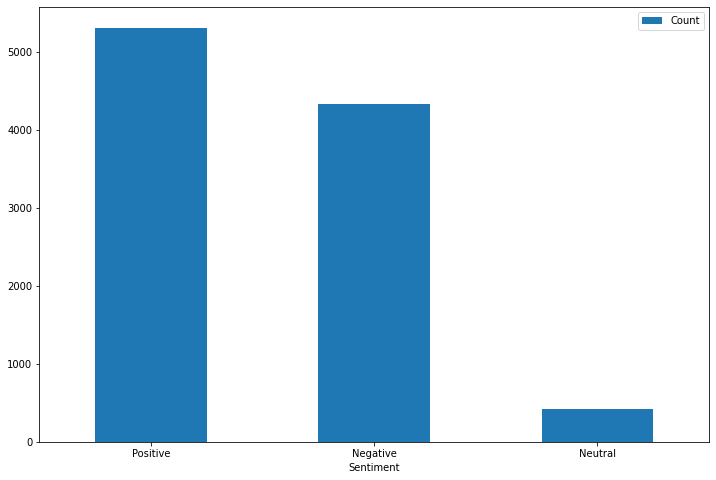

In [173]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the sentiment column unique value and their counts.
sentiment_values = merged_data['Review_Sentiment'].unique()

senti = pd.DataFrame({'Sentiment':sentiment_values, 'Count': merged_data['Review_Sentiment'].value_counts()})
senti.plot.bar(x='Sentiment', y='Count', rot=0, figsize=(12,8))

In [0]:
#Exporting data to csv.
merged_data.to_csv(r'drive/My Drive/gtdt/Drug_Recommender.csv', index=False)

**Weighted average of rating and useful count**

In [0]:
data = pd.read_csv('drive/My Drive/gtdt/Drug_Recommender.csv')

In [176]:
data.head()

,Disease,Drug,Symptoms,Review,Review_Sentiment,Rating,UsefulCount
0,transient ischemic attack,Aspirin,"['speech slurred', 'dysarthria', 'facial pares...","""No side effects, easy to take, no more sympt...",Positive,10,10
1,transient ischemic attack,Clopidogrel,"['speech slurred', 'dysarthria', 'facial pares...","""I&#039;ve been taking this medicine for a lit...",Negative,10,8
2,transient ischemic attack,Clopidogrel,"['speech slurred', 'dysarthria', 'facial pares...","""I took ibuprofen (2 caps at night for severe ...",Negative,6,13
3,transient ischemic attack,Clopidogrel,"['speech slurred', 'dysarthria', 'facial pares...","""After my VAD Stroke I am on plavix. I have a...",Positive,5,9
4,transient ischemic attack,Bayer Children's Aspirin,"['speech slurred', 'dysarthria', 'facial pares...","""No side effects, easy to take, no more sympt...",Positive,10,10


In [0]:
data = data.sort_values(['Drug'])

In [0]:
def wavg(group, avg_name, weight_name):
    d = group[avg_name]
    w = group[weight_name]
    try:
        return (d * w).sum() / w.sum()
    except ZeroDivisionError:
        return d.mean()

In [179]:
wavg(data, "Rating", "UsefulCount")

7.856535504296699

In [180]:
data.groupby(["Disease", "Drug"]).apply(wavg, "Rating", "UsefulCount")

Disease                    Drug                    
alzheimer's disease        Aricept                      5.807916
                           Aricept ODT                  9.000000
                           Donepezil                    5.503089
                           Exelon                       7.526027
                           Galantamine                  8.510638
                                                         ...    
schizophrenia              Zyprexa Zydis                6.304348
transient ischemic attack  Aspirin                     10.000000
                           Bayer Children's Aspirin    10.000000
                           Clopidogrel                  6.766667
                           Plavix                       5.000000
Length: 403, dtype: float64

In [0]:
data_wavg = data.groupby(["Drug"], as_index=False).apply(wavg, "Rating", "UsefulCount")

In [0]:
data_wavg = pd.DataFrame(data_wavg)
data_wavg.columns = ['Rating_Wavg']

In [183]:
data_wavg

,Rating_Wavg
0,7.350122
1,8.714286
2,8.000000
3,10.000000
4,6.376068
...,...
355,10.000000
356,9.000000
357,7.338843
358,6.304348


In [184]:
d1 = data['Drug'].unique().tolist()
d1 = pd.DataFrame(d1)
d1.columns = ['Drug']
d1

,Drug
0,Abilify
1,Abilify Maintena
2,Acetaminophen / chlorpheniramine
3,Acetaminophen / phenyltoloxamine
4,Acetazolamide
...,...
355,Zurampic
356,Zyloprim
357,Zyprexa
358,Zyprexa Zydis


In [185]:
result = pd.concat([d1, data_wavg], axis=1, join='inner')
result

,Drug,Rating_Wavg
0,Abilify,7.350122
1,Abilify Maintena,8.714286
2,Acetaminophen / chlorpheniramine,8.000000
3,Acetaminophen / phenyltoloxamine,10.000000
4,Acetazolamide,6.376068
...,...,...
355,Zurampic,10.000000
356,Zyloprim,9.000000
357,Zyprexa,7.338843
358,Zyprexa Zydis,6.304348


In [0]:
merged_wavg = pd.merge(result, data, on='Drug')

In [0]:
merged_wavg.drop(columns=['Symptoms','Rating'], inplace=True)
merged_wavg = merged_wavg[['Disease','Drug', 'Review', 'Review_Sentiment', 'Rating_Wavg', 'UsefulCount']]

In [188]:
merged_wavg

,Disease,Drug,Review,Review_Sentiment,Rating_Wavg,UsefulCount
0,schizophrenia,Abilify,"""This medication has helped my son a great dea...",Positive,7.350122,40
1,schizophrenia,Abilify,"""This medication made me feel like my brain wa...",Negative,7.350122,10
2,schizophrenia,Abilify,"""I&#039;ve used 5mg daily for three weeks. My ...",Positive,7.350122,30
3,schizophrenia,Abilify,"""Excellent medication! When I was first on Abi...",Negative,7.350122,11
4,schizophrenia,Abilify,"""I used to hear bad voices in my head,and thou...",Negative,7.350122,107
...,...,...,...,...,...,...
10055,schizophrenia,Zyprexa Zydis,"""Good for emergency situations. Versatile, qui...",Positive,6.304348,8
10056,schizophrenia,Zyprexa Zydis,"""Made me dizzy.""",Negative,6.304348,4
10057,schizophrenia,Zyprexa Zydis,"""I like it that it dissolves in your mouth jus...",Positive,6.304348,11
10058,pneumonia,Zyvox,"""In February 2008 I fell ill to Influenza A an...",Positive,9.655172,38


In [189]:
merged_wavg['Disease'].nunique()

26

In [190]:
merged_wavg = merged_wavg.sort_values(['Disease','Rating_Wavg'],ascending=False, ignore_index=True).groupby('Disease').head(10060)
merged_wavg

,Disease,Drug,Review,Review_Sentiment,Rating_Wavg,UsefulCount
0,transient ischemic attack,Aspirin,"""No side effects, easy to take, no more sympt...",Positive,10.000000,10
1,transient ischemic attack,Bayer Children's Aspirin,"""No side effects, easy to take, no more sympt...",Positive,10.000000,10
2,transient ischemic attack,Clopidogrel,"""I&#039;ve been taking this medicine for a lit...",Negative,6.766667,8
3,transient ischemic attack,Clopidogrel,"""I took ibuprofen (2 caps at night for severe ...",Negative,6.766667,13
4,transient ischemic attack,Clopidogrel,"""After my VAD Stroke I am on plavix. I have a...",Positive,6.766667,9
...,...,...,...,...,...,...
10055,alzheimer's disease,Namenda,"""I have taken it for about 4-5 yes. I feel ab...",Positive,4.100946,38
10056,alzheimer's disease,Namenda,"""My mother has been taking Namenda for Alzheim...",Negative,4.100946,120
10057,alzheimer's disease,Namenda,"""My mother has been treated with the Exelon (p...",Negative,4.100946,109
10058,alzheimer's disease,Namenda,"""My wife (74) has been taking Namenda since th...",Positive,4.100946,55


In [191]:
merged_wavg = merged_wavg.to_csv("/content/drive/My Drive/gtdt/Drug_Recommender.csv", index=False)
merged_wavg = pd.read_csv("/content/drive/My Drive/gtdt/Drug_Recommender.csv")
merged_wavg

,Disease,Drug,Review,Review_Sentiment,Rating_Wavg,UsefulCount
0,transient ischemic attack,Aspirin,"""No side effects, easy to take, no more sympt...",Positive,10.000000,10
1,transient ischemic attack,Bayer Children's Aspirin,"""No side effects, easy to take, no more sympt...",Positive,10.000000,10
2,transient ischemic attack,Clopidogrel,"""I&#039;ve been taking this medicine for a lit...",Negative,6.766667,8
3,transient ischemic attack,Clopidogrel,"""I took ibuprofen (2 caps at night for severe ...",Negative,6.766667,13
4,transient ischemic attack,Clopidogrel,"""After my VAD Stroke I am on plavix. I have a...",Positive,6.766667,9
...,...,...,...,...,...,...
10055,alzheimer's disease,Namenda,"""I have taken it for about 4-5 yes. I feel ab...",Positive,4.100946,38
10056,alzheimer's disease,Namenda,"""My mother has been taking Namenda for Alzheim...",Negative,4.100946,120
10057,alzheimer's disease,Namenda,"""My mother has been treated with the Exelon (p...",Negative,4.100946,109
10058,alzheimer's disease,Namenda,"""My wife (74) has been taking Namenda since th...",Positive,4.100946,55


In [0]:
# Taking drugs only with positive reviews for recommendation
merged_wavg = merged_wavg.drop( merged_wavg[merged_wavg['Review_Sentiment'] == "Negative"].index)
merged_wavg = merged_wavg.drop( merged_wavg[merged_wavg['Review_Sentiment'] == "Neutral"].index)

In [193]:
merged_wavg.head()

,Disease,Drug,Review,Review_Sentiment,Rating_Wavg,UsefulCount
0,transient ischemic attack,Aspirin,"""No side effects, easy to take, no more sympt...",Positive,10.000000,10
1,transient ischemic attack,Bayer Children's Aspirin,"""No side effects, easy to take, no more sympt...",Positive,10.000000,10
4,transient ischemic attack,Clopidogrel,"""After my VAD Stroke I am on plavix. I have a...",Positive,6.766667,9
5,transient ischemic attack,Plavix,"""After my VAD Stroke I am on plavix. I have a...",Positive,5.000000,9
6,schizophrenia,Mellaril,"""Moochie used to take Melleril, was always cal...",Positive,10.000000,22


In [0]:
# taking predicted disease as input and recommending drug based on highest weighted average of ratings
groupedByCount = merged_wavg.groupby(['Disease', 'Drug', 'Rating_Wavg'])['UsefulCount'].sum().reset_index()

In [195]:
groupedByCount

,Disease,Drug,Rating_Wavg,UsefulCount
0,alzheimer's disease,Aricept,5.807916,1454
1,alzheimer's disease,Donepezil,5.503089,1559
2,alzheimer's disease,Exelon,7.526027,80
3,alzheimer's disease,Galantamine,8.510638,71
4,alzheimer's disease,Memantine,4.286241,218
...,...,...,...,...
327,schizophrenia,Zyprexa Zydis,6.304348,19
328,transient ischemic attack,Aspirin,10.000000,10
329,transient ischemic attack,Bayer Children's Aspirin,10.000000,10
330,transient ischemic attack,Clopidogrel,6.766667,9


In [0]:
groupedByDisease = groupedByCount.groupby('Disease')

In [197]:
predicted_drug = pd.DataFrame(groupedByDisease.get_group('osteoporosis').nlargest(3, ['Rating_Wavg', 'UsefulCount']))
predicted_drug

,Disease,Drug,Rating_Wavg,UsefulCount
247,osteoporosis,Calcium / vitamin d,9.0,15
249,osteoporosis,Caltrate 600+D,9.0,15
246,osteoporosis,Calci-Chew,8.0,5


In [198]:
print("Recommended drugs for this disease are:\n ", predicted_drug["Drug"].unique())

Recommended drugs for this disease are:
  ['Calcium / vitamin d' 'Caltrate 600+D' 'Calci-Chew']
